### แบบฝึกหัด 2-10 Spread
เอกสารประกอบ
- https://www.thaibma.or.th/EN/Investors/Individual/Blog/2019/04062019.aspx
- https://www.finnomena.com/fundtalk/us-2-10-spread-usd-jp/
- ช่วงวันที่ทดสอบคือ 1990-01-01 ถึง 2022-02-11 

In [1]:
#!pip install starfishX --upgrade

In [15]:
import starfishX as sx
sx.__version__

0.155536

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import starfishX as sx
from starfishX.utilHelpers import HistStockPrice

In [4]:
obj = HistStockPrice()

you are using nologin method, data you access may be limited


#### หาอัตราผลตอบแทนพันธบัตร 10 ปี , 2 ปี และดัชนี s&p500

In [5]:
df = obj.getPrice('US10Y',start='1990-01-01',exchange='tvc')
df['US02Y'] = obj.getPrice('US02Y',start='1990-01-01',exchange='tvc')
df['SPX'] = obj.getPrice('SPX',start='1990-01-01',exchange='sp')

df = df.dropna()

เอกสารประกอบ https://www.thaibma.or.th/EN/Investors/Individual/Blog/2019/04062019.aspx
![title](img/lab13_01.png)

In [6]:
df.head(5)

US10Y  US02Y     SPX
Date                            
1990-01-09  8.026  7.911  349.62
1990-01-10  8.021  7.911  347.31
1990-01-11  8.021  7.894  348.53
1990-01-12  8.054  7.938  339.93
1990-01-17  8.201  8.107  337.40

In [7]:
df.tail(5)

US10Y  US02Y      SPX
Date                             
2022-02-07  1.918  1.294  4483.88
2022-02-08  1.965  1.343  4521.55
2022-02-09  1.940  1.358  4587.19
2022-02-10  2.035  1.581  4504.07
2022-02-11  1.915  1.500  4418.65

In [8]:
#หา 2-10Y Spread
df['2-10Y'] = df['US10Y'] - df['US02Y']

เอกสารประกอบ https://www.finnomena.com/fundtalk/us-2-10-spread-usd-jp/
![title](img/lab13_02.png)

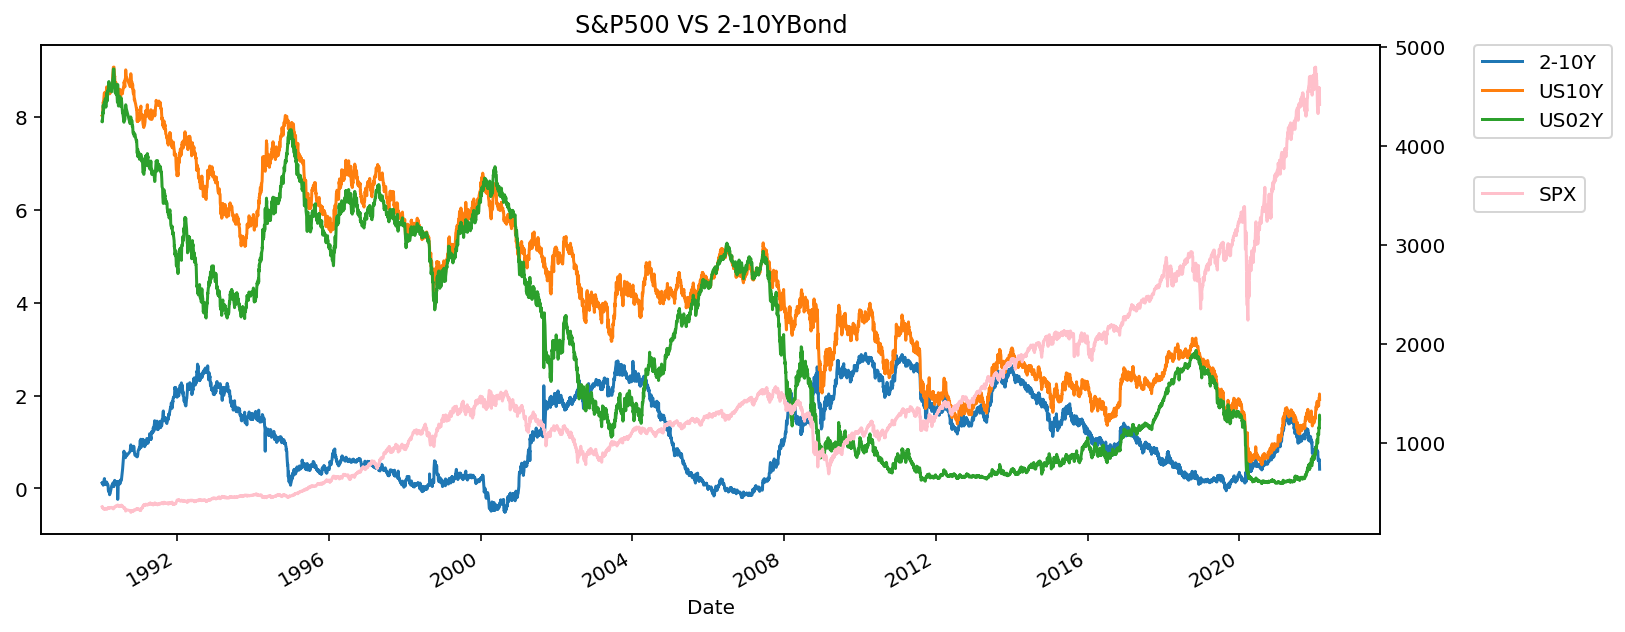

In [9]:
fig, ax = plt.subplots()    

ax2 = ax.twinx()

df[['2-10Y','US10Y','US02Y']].plot(ax=ax,figsize=(12,5),title='S&P500 VS 2-10YBond')
df['SPX'].plot(ax=ax2,color='pink')

ax.legend( bbox_to_anchor=(1.18, 1.02))
ax2.legend( bbox_to_anchor=(1.16, 0.75))

### 2-10 Spread

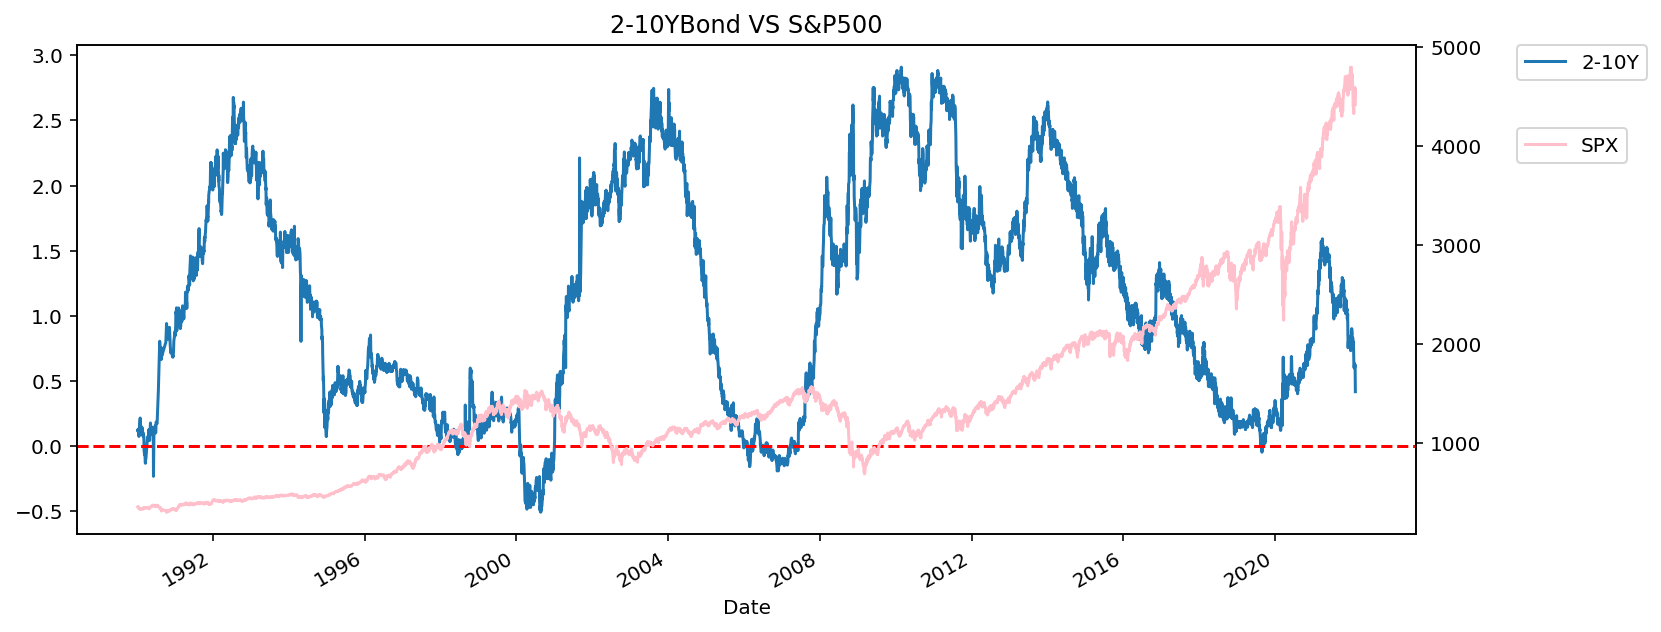

In [10]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

df[['2-10Y']].plot(ax=ax,figsize=(12,5),title='2-10YBond VS S&P500')
ax.axhline(y=0.0, color='r', linestyle='--')
df['SPX'].plot(ax=ax2,color='pink')

ax.legend( bbox_to_anchor=(1.18, 1.02))
ax2.legend( bbox_to_anchor=(1.165, 0.85))

In [11]:
#ถ้าไม่นับกรณีช่วงปี 1991 ที่ เกิด Inverted Yield Curve (Bond2Y>Bond10Y) ก็สังเกตได้ว่า
#เมื่อ 2-10Y ต่ำกว่าศูนย์ สักพัก s&p ก็จะมีการปรับตัวลง 

In [12]:
df.tail(5)

US10Y  US02Y      SPX  2-10Y
Date                                    
2022-02-07  1.918  1.294  4483.88  0.624
2022-02-08  1.965  1.343  4521.55  0.622
2022-02-09  1.940  1.358  4587.19  0.582
2022-02-10  2.035  1.581  4504.07  0.454
2022-02-11  1.915  1.500  4418.65  0.415

In [13]:
#ตอนนี้ 2-10Y อยู่ที่ระดับ 0.417 แต่ก็มีแนวโน้มปรับตัวลง ! แต่ก็ยังไม่ถึงศูนย์
#โดย SMA สั้น 25 และ 75 วัน ปรับตัวต่ำกว่า SMA200 วัน

<AxesSubplot:xlabel='Date'>

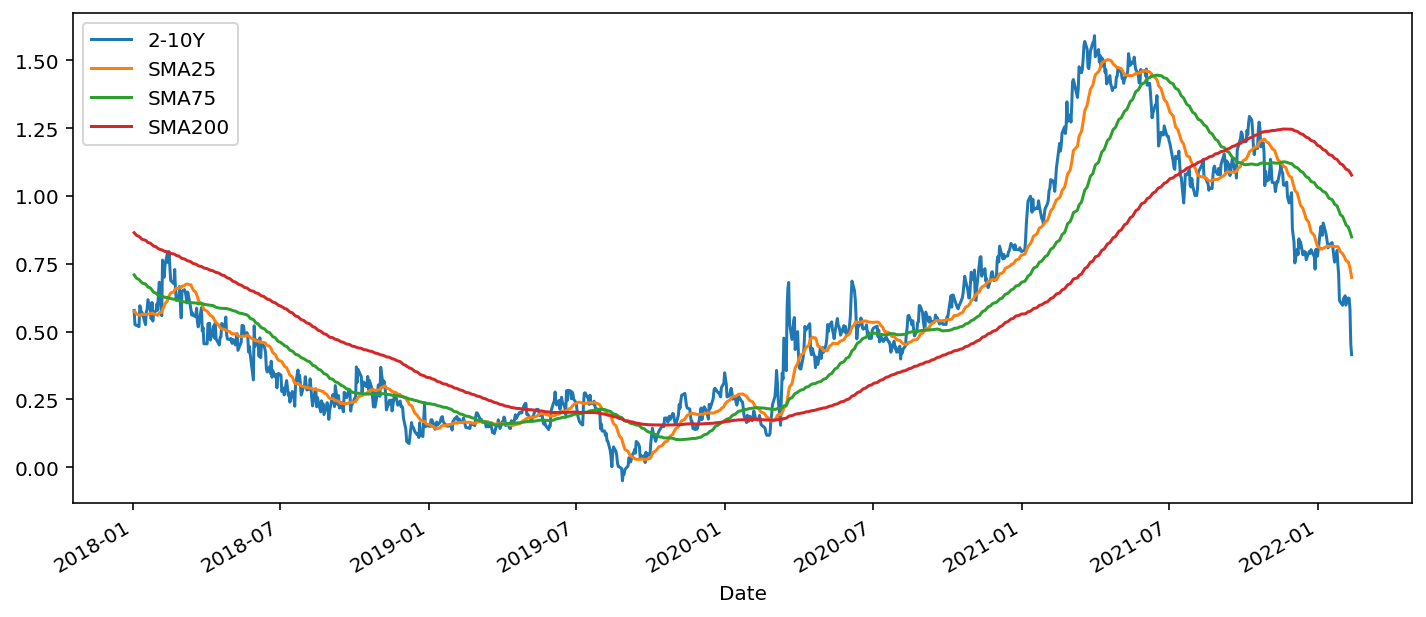

In [14]:
rp = df[['2-10Y']].copy()
rp['SMA25'] = rp[['2-10Y']].rolling(window=25).mean()
rp['SMA75'] = rp[['2-10Y']].rolling(window=75).mean()
rp['SMA200'] = rp[['2-10Y']].rolling(window=200).mean()
rp[rp.index>'2018-01-01'].plot(figsize=(12,5))